# Text search/indexing using prime number factorisation
---
## Abstract
This report details the proof of consecpt for using prime numbersfor indexing text with th eintention of seraching for words within a data set. This technique is shown to segnificaltly out perform regular string comparison in all the aspect that were tested i.e number of records, lengths of records, length of dictionary, and number of words searched for.

The targeted usecase for this algorithm is in exploratary text analysis by finding the fequency that specific word combinations appear together within the same text record.

---

## Background knowledge
This techique untilises the knowledge described by the unique-prime-factorization theorem where it is understood that every integer greater than 1 can be broken down into a unique list of its prime factors. 

---

## Technique method

The process is broken down into preprocessing and searching:

#### Preprocessing
* Defining the dictionary of the data set
* Index the dinctionary by storing a unique prime number for each word in the dictionary
* Index the text records by storing the product of th eprime numbers that make up each text record

#### Searching
* Fetch the unique prime number of the word to serach for from the indexed dictionary
* Find the modulo of each indexed text record against the value of the indexed word being serached for
* If the modulo calculation equals 0 then the serach word exists in that record

#### Example

Take the data set of text:

* "black cat on mat",
* "black hat for you",
* "cat sat on you"

The dictionary of this data set is:

* "black",
* "cat",
* "on",
* "mat",
* "hat",
* "for",
* "you",
* "sat"

Now assign prime number to each word in dictionary:

* "black": 2,
* "cat"  : 3,
* "on"   : 5,
* "mat"  : 7,
* "hat"  : 11,
* "for"  : 13,
* "you"  : 17,
* "sat"  : 19

Now turn each text record into the product of its prime numbers:

* "black cat on mat" = "black(2) cat(3) on(5) mat(7)" = 2 x 3 x 5 x 7 = **210**
* "black hat for you" = black(2) hat(11) for(13) you(17) = 2 x 11 x 13 x 17 = **4862**
* "cat sat on you" = "cat(3) sat(19) on(5) you(17)" = 3 x 19 x 5 x 17 = **4845**

Now the indexed data set is:

* 210,
* 4862,
* 4845

To search for the word **"sat"**(prime equvilant 19) in the data set we calculate the modulo of its equvilate prime across the data set and where the result is '0' the word exists within that text record:

* 210 % 19 = 1 (**not a factor**)
* 4862 % 19 = 17 (**not a factor**)
* 4845 % 19 = 0 (**is a factor** "cat **sat** on you")

Another example, search for **"you"** (prime equivilant 17):

* 210 % 17 = 6 (**not a factor**)
* 4862 % 17 = 0 (**is a factor** "black hat for **you**")
* 4845 % 17 = 0 (**is a factor** "cat sat on **you**")

#### Searching for multiple words

Becuase of the associative property of factors, to serach for multiple words you do the same as before except calculate the modulo using the product of the words that you are seraching for:

Examples:

---

Search for "you" and "cat"

"you"(17) x "cat"(3) = 51

* 210 % 51 = 0 (**is a factor** "black **cat** **on** mat")
* 4862 % 51 = 2 (**not a factor**)
* 4845 % 51 = 0 (**is a factor** "**cat** sat **on** you")

---

Search for "cat" and "on"

"cat"(3) x "on"(5) = 15

* 210 % 15 = 0 (**is a factor** "black **cat** **on** mat")
* 4862 % 15 = 2 (**not a factor**)
* 4845 % 15 = 0 (**is a factor** "**cat** sat on **you**")

---

Search for "black", "hat" and "you"

"black"(2) x "hat"(11) x you(17) = 374

* 210 % 374 = 210 (**not a factor**)
* 4862 % 374 = 0 (**is a factor** "**black** **hat** for **you**")
* 4845 % 374 = 231 (**not a factor**)

---
# Implimentation and testing
This section shows an implimentation of the technique along side a standard string comparision implimentation with performance camapaisons made between the two techniques.

Steps in this section are:
1. Generate synthetic data set to test with
2. Impliment standard string comparision serach functions
3. Impliment prime factorisation index/serach function
4. Compare performance

In [1]:
%matplotlib inline

In [2]:
import random
import time
import copy
import numpy as np
import numpy.core.defchararray as npstr
import matplotlib.pyplot as plt

---
## Synthetic test data generation
First step is developing convienent functions that allow for control over different varibles concerning the data set. This makes comparing performance more informative and reproducable.

In [3]:
# generates a random string of letters for a given length

def generateWord(length):
    abc = 'abcdefghijklmnopqrstuvwxyz'
    word = ''
    for i in range(length):
        word += random.choice(abc)
    return word

In [54]:
# generates a normally distributed list of numbers with a given length, mean and diviation

def generateLengths(count,mean, dist, showGraph = False):
    s = np.random.normal(mean, dist, count)
    s = np.round(s,0).astype(int)
    lessThanOne = s < 1
    s[lessThanOne] = 1
    if showGraph:
        plt.hist(s, 30, normed=True)
        plt.title("Histogram of lengths")
        plt.show()
    return s

In [5]:
# generates a random dictionary of words whose lengths are normally distributed

def generateDictionary(count):
    currentDict = []
    wordLengths = generateLengths(count,5,1)
    for length in wordLengths:
        oldLen = len(currentDict)
        while(len(currentDict) == oldLen):
            word = generateWord(length)
            if word not in currentDict:
                currentDict.append(word)  
    return np.asarray(currentDict)

In [58]:
# Selects random words from a given dictionary that matches given length requirments

def pickRandomWordsFromDict(dictionary, minLength, maxLength, count):
    output = []
    for word in dictionary:
        if maxLength >= len(word) >= minLength:
            output.append(word)
            if len(output)==count:
                return output
    return ValueError('Dictionary did not conatin enough word of your min length')
    

In [6]:
# generates a list of randomy generated strings of text made of of words from a given dictionary
# and where the number of words used in the text are normally distributed to a given mean and diviation

def generateComments(count,dictionary,mean,dist,showGraph = False):
    comments = []
    lengths = generateLengths(count,mean,dist,showGraph) 
    for length in lengths:
        comment = ''
        for i in range(length):
            comment += random.choice(dictionary) + ' '
        comments.append(comment.rstrip())
    return np.asarray(comments)

## Testing syntehtic data functions

In [69]:
generateWord(3)

'cwk'

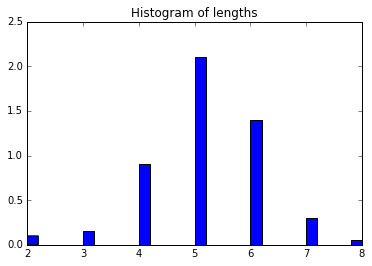

array([5, 7, 5, 5, 5, 6, 4, 6, 5, 4, 6, 5, 6, 7, 5, 5, 5, 5, 7, 5, 2, 5, 6,
       5, 6, 5, 7, 6, 6, 5, 4, 6, 3, 5, 6, 6, 5, 4, 5, 6, 6, 5, 3, 8, 5, 4,
       5, 5, 5, 4, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 7, 5, 5, 6, 3, 4, 6, 6, 4,
       5, 4, 6, 5, 6, 4, 4, 6, 5, 6, 4, 5, 2, 5, 4, 4, 6, 4, 4, 5, 6, 6, 4,
       5, 5, 6, 7, 6, 5, 4, 6])

In [70]:
generateLengths(100,5,1,True)

In [91]:
dictionary = generateDictionary(100)
dictionary [1:5]

array(['mgbbas', 'wgmowl', 'qarlmj', 'abvgr'], 
      dtype='<U7')

In [92]:
pickRandomWordsFromDict(dictionary,3,8,3)

['kszg', 'mgbbas', 'wgmowl']

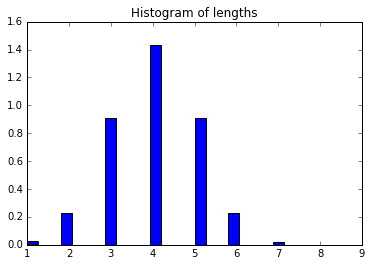

array(['kexic abvgr uawrlh', 'gsjzo syiht qzr lnxfo pusnf',
       'glvmt xezoq tofoe cezvzmf wlfwt', 'jjcth iarc frvru'], 
      dtype='<U55')

In [97]:
comments = generateComments(1000000,dictionary,4,1,True)
comments[1:5]

---
# Implimenting word search using string comparison

In [106]:
# Finds records that conatin specific words using numpy's string comparitor function

def findCommentsWithWords(comments,words):
    currentVocab = copy.deepcopy(comments)
    for w in words:
        currentVocab = currentVocab[(npstr.find(currentVocab, w) != -1)]
    return currentVocab

In [107]:
#Returns number of records that contain specific words

def numberOfMatches(comments, words):
    result = findCommentsWithWords(comments,words)
    return len(result)

### Test speed of finding number of records with specific words

In [99]:
randoWords =  pickRandomWordsFromDict(dictionary,3,8,2)
randoWords

['kszg', 'mgbbas']

In [103]:
start = time.time()
print(str(numberOfMatches(comments,randoWords)) + ' number of records found containing ' + str(randoWords))
end = time.time()
print(str(end - start)+' seconds')

1315 number of records found containing ['kszg', 'mgbbas']
1.1351401805877686 seconds


---
# Implimenting word indexing/search by prime factorisation

### Preprocessing/Indexing


In [128]:
# Assigns a prime number to each word in a given dictionary and returns a dict object 

def createIndexSchema(dictionary):
    primes = np.genfromtxt ('primes.csv', delimiter=",").astype(int)
    primeFit = primes[1:len(dictionary)+1,1]
    index = dict(np.c_[dictionary,primeFit])
    return index

In [129]:
# Converts a list of strings into the products of the words in the string's prime number indexes

def indexComments(comments,indexSchemal):
    output = []
    for comment in comments:
        prod = 1
        words = comment.split(' ')
        for word in words:
            if word in indexSchemal:
                prod *= int(indexSchemal[word])
        output.append(prod)
    return output

In [130]:
# Return the indexed dictionary and text data for a given normal dictionary of words and list of text data

def preprocessPrimeComments(dictionary,comments):
    indexSchemal = createIndexSchema(dictionary)
    indexedComments = indexComments(comments,indexSchemal)
    return [indexSchemal,indexedComments]

### Searching

In [131]:
# converts given words into their indexed product

def convertWordsToProduct(indexSchema, words):
    output = 1
    for word in words:
        output *= int(indexSchema[word])
    return output

In [132]:
# calculates the modulo of the indexed text data against the given search word product 
# and return a boolean list of which records match the search

def searchByPrimeFact(indexedComments,serachProduct):
    return  (np.mod(indexedComments, serachProduct) == 0)

In [136]:
# returns a boolean list of which of the given indexed records conatain 
# the given words using the given indexed dictionary

def findCommentsUsingPrimeFact(indexedComments,index, words):
    prod = convertWordsToProduct(index, words)
    return searchByPrimeFact(indexedComments,prod)

### Test speed of finding numberof records with specific words

In [137]:
[index, indexedComments] = preprocessPrimeComments(dictionary,comments)

In [139]:
start = time.time()
print(findCommentsUsingPrimeFact(indexedComments,index,randoWords).sum())
end = time.time()
print(str(end - start)+' seconds')

1315
0.1415870189666748 seconds


---
# Compare Performance
The different varibles that will be tested are: 

* Number of comments x
* Number of query words x
* Length of comments x
* Dictionary length x


In [22]:
def timeFunction(func, *params):
    start = time.time()
    output = func(*params)
    end = time.time()
    return[output, (end - start)]

In [23]:
[o,t] = timeFunction(findCommentsUsingPrimeFact,indexedComments,index,['celd','piluh'])
print(o.sum(),t)

16489 0.09079694747924805


In [24]:
def generateCommentData(dictLength, numOfComments, commentLengthMean, commentLengthDist, graph = False):
    random.seed(50)
    np.random.seed(15)
    dictionary = generateDictionary(dictLength)
    comments = generateComments(numOfComments,dictionary,commentLengthMean,commentLengthDist,graph)
    return [dictionary, comments]

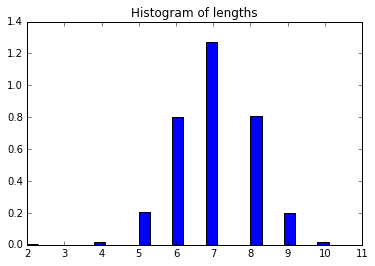

In [142]:
[d,c] = generateCommentData(300,100000,7,1, True)

In [147]:
d[:5]

array(['piluh', 'wpykc', 'rkhvr', 'celd', 'lkhgc'], 
      dtype='<U8')

In [146]:
c[:5]

array(['pdffykq cqke dtny beaj bgtu yqyv nsimkr sxfw',
       'tkrt rkhvr nptm runn tabm chedw qpcjfn gahg',
       'oijzv oijzv ezdi zokmvm bysfx ennoc',
       'odixp awjqt ngkajj dzx hsoe grsdnv piqgh rpjns',
       'zjpleh qcprx ztninb masdnf uaqaj yerlz rapjzj'], 
      dtype='<U71')

In [148]:
wordsToserachFor = pickRandomWordsFromDict(d,3,7,3)
wordsToserachFor

['piluh', 'wpykc', 'rkhvr']

In [149]:
[o,t] = timeFunction(numberOfMatches, c, wordsToserachFor)

In [150]:
t

0.12526583671569824

In [33]:
[indx,indxCom] = preprocessPrimeComments(d,c)

# Performance against number of comments to search

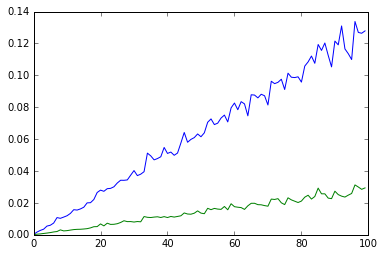

In [35]:
stringCompTimings = []
primeTimings = []
for n in range(100,100000,1000):
    [o,t] = timeFunction(numberOfMatches, c[:n], wordsToserachFor)
    stringCompTimings.append(t)
    
    [o,t] = timeFunction(findCommentsUsingPrimeFact, indxCom[:n],indx, wordsToserachFor)
    primeTimings.append(t)
plt.figure()
plt.plot(stringCompTimings)
plt.plot(primeTimings)
plt.show()

# Performance against number of words searched for

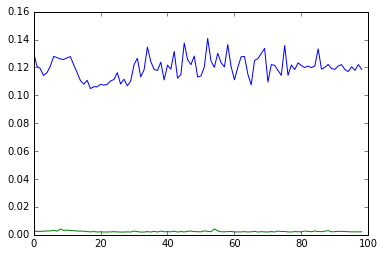

In [36]:
stringCompTimings = []
primeTimings = []
for n in range(1,100):
    randWords = pickRandomWordsFromDict(d,2,7,n)
    [o,t] = timeFunction(numberOfMatches, c[:100000], randWords)
    stringCompTimings.append(t)
    
    [o,t] = timeFunction(findCommentsUsingPrimeFact, indxCom[:10000],indx, randWords)
    primeTimings.append(t)
plt.figure()
plt.plot(stringCompTimings)
plt.plot(primeTimings)
plt.show()

# Performance against length of comments to serach through

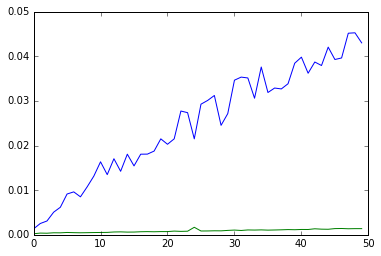

In [42]:
stringCompTimings = []
primeTimings = []
for n in range(5,500,10):
    [dl,cl] = generateCommentData(30,1000,n,1)
    randWords = pickRandomWordsFromDict(dl,2,7,4)
    
    [o,t] = timeFunction(numberOfMatches, cl, randWords)
    stringCompTimings.append(t)
    
    [indexSchemal, indxComl] = preprocessPrimeComments(dl,cl)
    [o,t] = timeFunction(findCommentsUsingPrimeFact, indxComl,indexSchemal, randWords)
    primeTimings.append(t)
plt.figure()
plt.plot(stringCompTimings)
plt.plot(primeTimings)
plt.show()

In [38]:
d = list(map(lambda a,b:a/b,stringCompTimings,primeTimings))
d

[17.184866723989682, 26.318216789194736, 36.65258132956153, 33.79054804198628]

In [39]:
primeTimings

[0.0008318424224853516,
 0.005578041076660156,
 0.008090972900390625,
 0.009449005126953125]

# Performance against length of dictionary

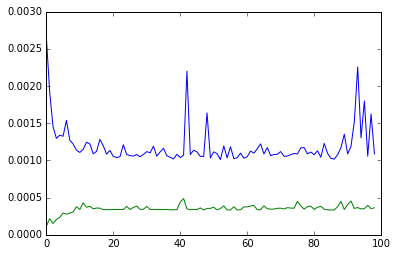

In [45]:
stringCompTimings = []
primeTimings = []
for n in range(10,1000,10):
    [dl,cl] = generateCommentData(n,1000,10,1)
    randWords = pickRandomWordsFromDict(dl,2,7,4)
    
    [o,t] = timeFunction(numberOfMatches, cl, randWords)
    stringCompTimings.append(t)
    
    [indexSchemal, indxComl] = preprocessPrimeComments(dl,cl)
    [o,t] = timeFunction(findCommentsUsingPrimeFact, indxComl,indexSchemal, randWords)
    primeTimings.append(t)
plt.figure()
plt.plot(stringCompTimings)
plt.plot(primeTimings)
plt.show()